3.58375652680674 -1.8387657949480514


/home/aakash/summer_intern/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in exp


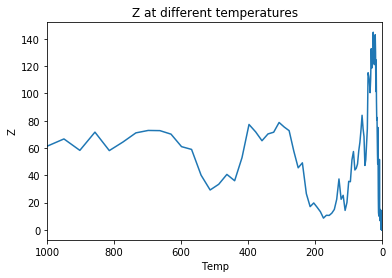

In [3]:
## SANN
# Himmelblau Function -- min((x^2 + y - 11)^2 + (x + y^2 - 7)^2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ignore the warning of zero division.
np.seterr(divide='ignore')

x = 2#initial x
y = 1#initial y

def fval(x, y):
    z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return z

## Hyperparameters(user defined)
T0 = 1000 ##initial temperature.
M = 300 ## num. iterations
N = 15 # for a particular M how many times you want to search your neighborhood.
a = 0.95 # cooling rate
k =0.1 #helps reduce the step size.
temp = [] ## to keep track of temperatures.
of_val = []#OF value at end of each m.
for i in range(M): ## How many times you want to decrease temperature.a
    for j in range(N): # for each m how many neighborhood searches.
        ### X -->
        r1 =np.random.rand()
        r2= np.random.rand() ## increase or decreasee x value by this amount;
        if r1 > 0.5:
            step_x = k*r2
        else:    
            step_x = -k*r2
        
        ### Y -->
        r1 =np.random.rand()
        r2= np.random.rand() ## increase or decreasee x value by this amount;
        if r1 > 0.5:
            step_y = k*r2
        else:    
            step_y = -k*r2
            
        ## New temporary solution/.
        x_temp = x + step_x
        y_temp = y + step_y
        
        f_curr = fval(x, y)
        f_temp = fval(x_temp, y_temp) ## if its better then we accept it.
            
        ## Else we may or may not take it.
        ## If it is worse/
        rand_n = np.random.rand()
        formula = 1.0/np.exp((f_temp - f_curr)/T0)
        
        if f_temp <= f_curr:
            x = x_temp
            y = y_temp
            
        elif rand_n <= formula: # we take the new solution/
            ## EXPLORE EXPLOIT DELIMMA IN RL.
            x = x_temp
            y = y_temp
            
        else:
            x=x
            y=y
            
    temp.append(T0)
    of_val.append(f_curr)
    T0 = a*T0    
    
print(x, y)
plt.plot(temp, of_val)
plt.title("Z at different temperatures")
plt.xlabel("Temp")
plt.ylabel("Z")
plt.xlim(1000, 0)
plt.show()